In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, tools_delens, misctools, tools_lens
%matplotlib inline
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
qlist = ['TT','TE','EE','EB']
i = 1
Lmax = 2048
nside, npix, lmax = 128, 12*128**2, 2*128

In [3]:
#pobj = prjlib.analysis_init(t='la',freq='com',fltr='cinv',snmin=1,snmax=100,ntype='base_roll50')
pobj = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=1,snmax=100,ntype='base_roll50')
qobj = tools_lens.init_qobj(pobj.stag,False,rlmin=300,rlmax=4096,qlist=qlist)
#Qobj = tools_lens.init_qobj(P.stag,False,rlmin=300,rlmax=4096,qlist=qlist)

In [4]:
W, wn = prjlib.window('la',ascale=5.0)
M = W/(W+1e-30)
iW2 = hp.ud_grade(M/(W+1e-30)**2,nside)
M = hp.ud_grade(M,nside)

In [5]:
ikalm = prjlib.load_input_plm( pobj.fpalm[i], lmax, ktype='k' )
ikwlm = curvedsky.utils.mulwin( ikalm, W**2 )

In [7]:
wlk = tools_delens.diag_wiener( qobj.f, pobj.kk, 20, Lmax, klist=qobj.qlist )
rkalm = {q: tools_lens.load_klms( qobj.f[q].alm[i], lmax, fmlm=qobj.f[q].mfb[i] ) for q in qlist }
rkwlm = {q: wlk[q][:lmax+1,None] * rkalm[q] for q in qlist}

load diag wiener filter: 100%|████████████████████████████████████████| 4/4 [00:00<00:00, 26.54it/s]


In [8]:
wkwlm = pickle.load(open(qobj.f['TT'].walm[i],"rb"))[0][:lmax+1,:lmax+1]

In [9]:
# cinv case
klms = {}
klms['IN'] = ikalm
klms['TT'] = rkwlm['TT']/wn[0]
klms['TE'] = rkwlm['TE']/wn[0]
klms['EE'] = rkwlm['EE']/wn[0]
klms['EB'] = rkwlm['EB']/wn[0]
klms['TTw'] = wkwlm
prjlib.view_maps(klms,M=M)

['IN', 'TT', 'TE', 'EE', 'EB', 'TTw']


In [11]:
klms = {}
klms['INw'] = ikalm
klms['TT'] = rkalm['TT']
klms['EB'] = rkalm['EB']
klms['TTN'] = rkalm['TT'] - ikalm
klms['EBN'] = rkalm['EB'] - ikalm
prjlib.view_maps(klms,M=M,min=-0.05,max=0.05)

['INw', 'TT', 'EB', 'TTN', 'EBN']


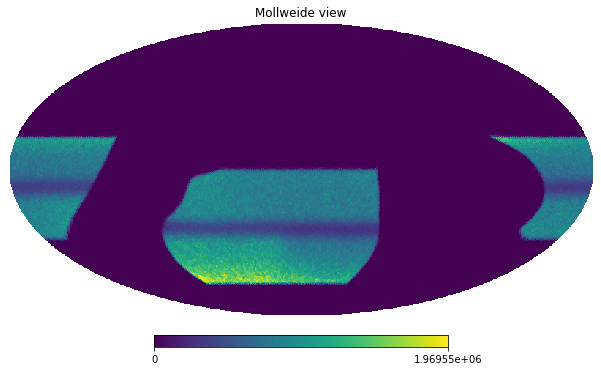

In [13]:
inkk = hp.ud_grade(hp.ud_grade(pickle.load(open(qobj.f['EE'].nkmap,"rb")),64),2048)
hp.mollview(inkk)

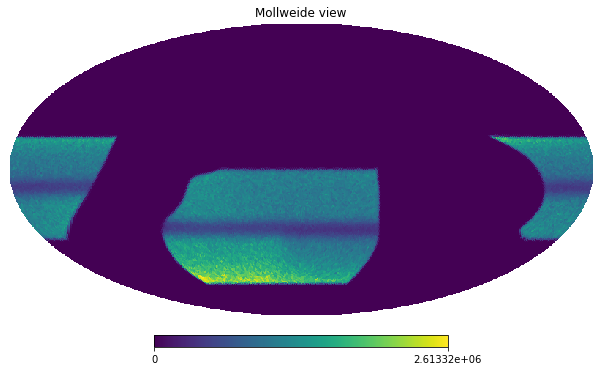

In [14]:
Al = np.loadtxt(qobj.f['EE'].al,unpack=True)[1]
iNkk = np.mean(1./Al[2:1000]) * inkk/np.max(inkk)
hp.mollview(iNkk)